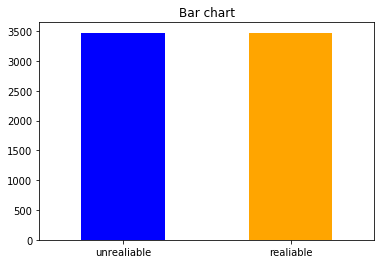

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

import warnings
warnings.filterwarnings("ignore")

# fake news = 1 
unreliable = 1
# real news = 0 
reliable = 0

file_path = 'data2.csv'
data = pd.read_csv(file_path)


count_Class = pd.value_counts(data["v1"], sort=True)
count_Class.plot(kind='bar', color=["blue", "orange"])
ax = plt.subplot()

ax.set_xticklabels(['unrealiable', 'realiable'], rotation=0)
plt.title('Bar chart')
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
# import enchant

import warnings

warnings.filterwarnings("ignore")

# fake news = 1 
unreliable = 1
# real news = 0 
reliable = 0


# file path 
file_path = 'data2.csv'
# read 
data = pd.read_csv(file_path)

# define stop words 
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll",
                  "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's",
                  'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',
                  'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is',
                  'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
                  'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
                  'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
                  'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
                  'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
                  'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',
                  'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
                  'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                  "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
                  'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
                  "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'also',
                  'said', '|', '–', '.', ',']


def construct_bag_of_words(data, label):
     
    def filter_text(text):

        lst = []

        words = str(text).lower().split(' ')

        for word in words:
            if word not in stop_words and word not in ['', "”", '—']:
                lst.append(word)

        return lst

    length = np.shape(data)[0]
    paragraph = ''
    for idx in range(length):
        n_label = data['v1'][idx]
        n_text = data['v2'][idx]

        if n_label == label:
            paragraph += str(n_text) + ' '

    if paragraph != ' ':

        filter_words = filter_text(paragraph)
        return Counter(filter_words) 
    else:
        raise Exception("Error")

# data: csv from pandas 
# label: data label; fake or real news 
def plot_words(data, label):
    x = construct_bag_of_words(data, label).most_common(20) 
 
    df = pd.DataFrame(x, columns=['Word', 'Count'])
    df.plot.bar(x='Word')
    if type == reliable:
        plt.title('Reliable')
    else:
        plt.title('Unreliable')
    plt.show()

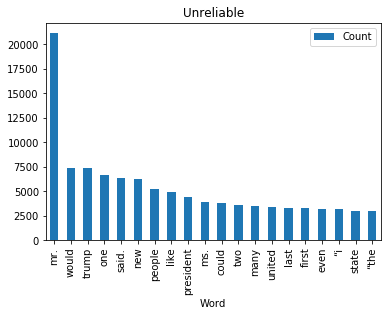

In [3]:
plot_words(data, reliable)

In [ ]:
plot_words(data, unreliable)